[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.sandbox.google.com/github/kornia/tutorials/blob/master/source/geometry_generate_patch.ipynb)

# Image patch generation

In this tutorial we are going to learn how to generate image patches using `kornia.geometry` components.


In [1]:
%%capture
!pip install kornia matplotlib

In [2]:
%%capture
!wget https://github.com/kornia/data/raw/main/homography/img1.ppm

First load libraries and images

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import cv2

import torch
import kornia as K

In [4]:
def imshow(image: np.ndarray, height: int = 10, width: int = 10):
    """Utility function to plot images."""
    plt.figure(figsize=(height, width))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [5]:
def imread(data_path: str) -> torch.Tensor:
    """Utility function that load an image an convert to torch."""
    # open image using OpenCV (HxWxC)
    img: np.ndarray = cv2.imread(data_path, cv2.IMREAD_COLOR)

    # cast image to torch tensor and convert to RGB
    img_t: torch.Tensor = K.utils.image_to_tensor(img, keepdim=False)  # BxCxHxW
    img_t = K.color.bgr_to_rgb(img_t)

    return img_t.float() / 255.

Load and show the original image

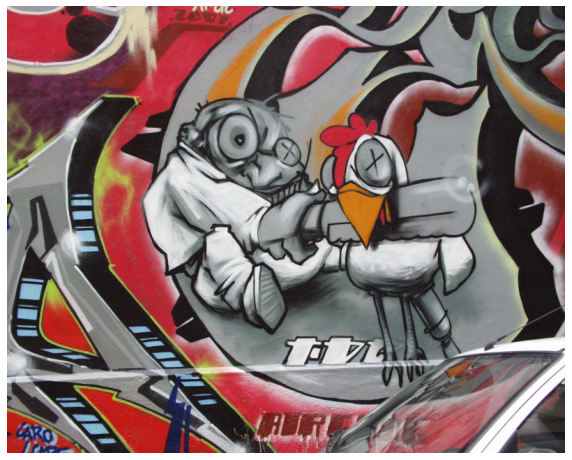

In [6]:
torch.manual_seed(0)

timg: torch.Tensor = imread('img1.ppm')

imshow(K.tensor_to_image(timg), 10, 10)

In the following section we are going to take the original image and generate random crops of a given size.

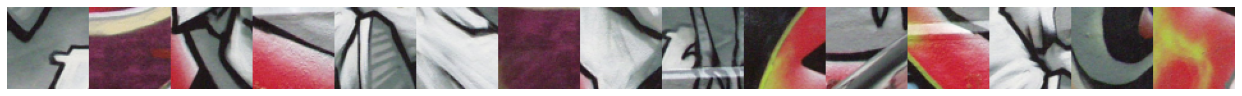

In [7]:
random_crop = K.augmentation.RandomCrop((64, 64))

patch = torch.cat([random_crop(timg) for _ in range(15)], dim=-1)

imshow(K.tensor_to_image(patch[0]), 22, 22)

Next, we will show how to crop patches and apply forth and back random geometric transformations.

/home/edgar/software/tutorials/.venv/lib/python3.8/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


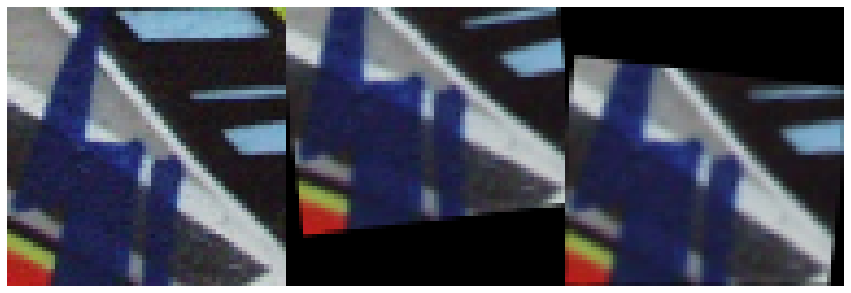

In [8]:
# transform a patch 

random_crop = K.augmentation.RandomCrop((64, 64))
random_affine = K.augmentation.RandomAffine(
    [-15, 15], [0., 0.25], return_transform=True)

# crop
patch = random_crop(timg)

# transform and retrieve transformation
patch_affine, transformation = random_affine(patch)

# invert patch
_, _, H, W = patch.shape
patch_inv = K.geometry.warp_perspective(
    patch_affine, torch.inverse(transformation), (H, W)
)

# visualise - (original, transformed, reconstructed)
patches_vis = torch.cat([patch, patch_affine, patch_inv], dim=-1)
imshow(K.tensor_to_image(patches_vis), 15, 15)